In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
credit = pd.read_csv("/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv")

In [4]:
credit.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
credit.shape

(660, 7)

In [7]:
credit.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

La columna "Sl_No" la eliminamos ya que se trata de una columna con los numeros de fila de cada cliente. Por otro lado, la columna "Customer Key" 

In [8]:
credits = credit.set_index("Customer Key")

In [9]:
credits.pop("Sl_No")

Customer Key
87073      1
38414      2
17341      3
40496      4
47437      5
        ... 
51108    656
60732    657
53834    658
80655    659
80150    660
Name: Sl_No, Length: 660, dtype: int64

In [10]:
credits.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,
87073,100000,2,1,1,0
38414,50000,3,0,10,9
17341,50000,7,1,3,4
40496,30000,5,1,1,4
47437,100000,6,0,12,3


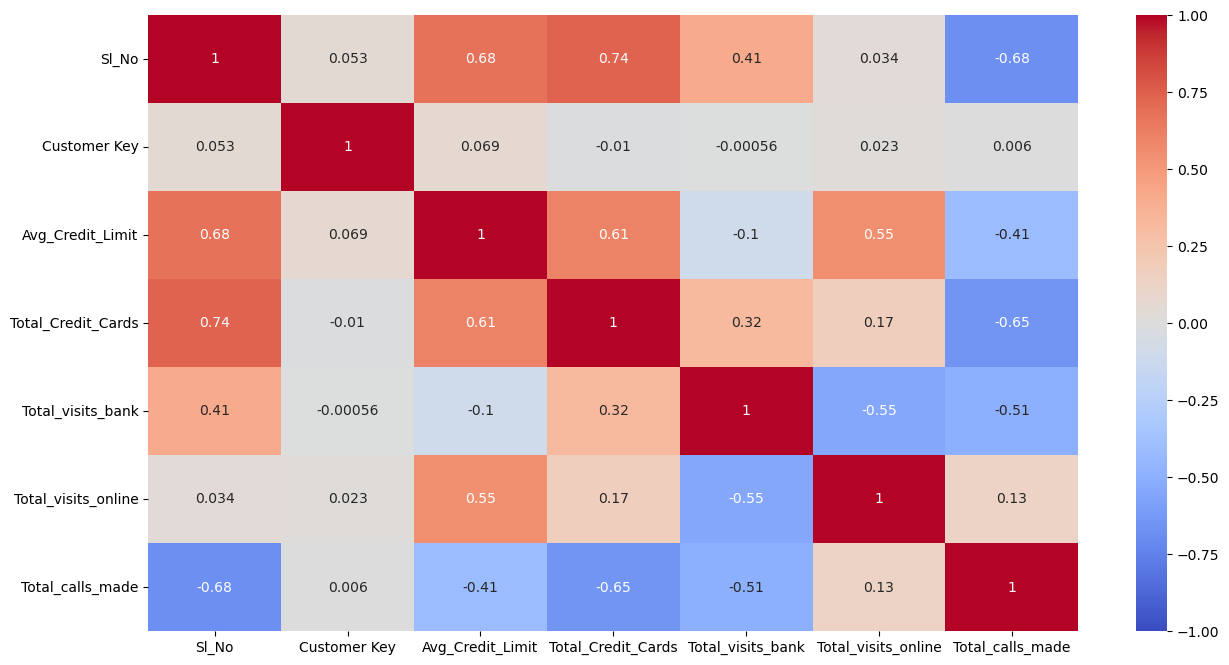

In [11]:
correlation_matrix = credit.corr()
rounded_matrix = np.round(correlation_matrix, decimals=2)
plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap="coolwarm")
plt.show()

In [12]:
credits.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


De estas columnas, solo la de "Avg_Credit_Limit" es la unica que contiene valores numericos continuos, las columnas restantes contienen valores numericos discretos

Convendria hacer un boxplot para las otras 4 columnas, asi observamos mas comodamente los datos

Ajusto algunos parametros en cada boxplot en base a sus valores maximos, para facilitar la lectura

Boxplot de Total Credit Cards:        


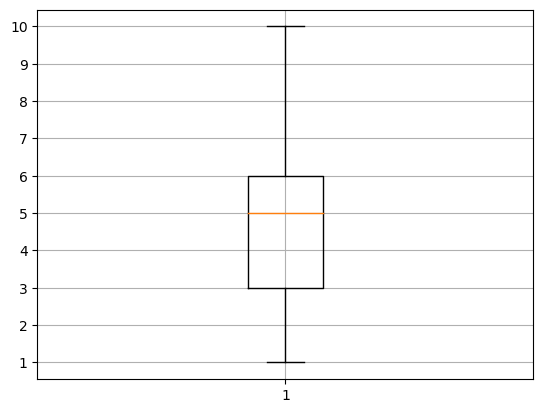

----------------------------------------------------------------------------
Boxplot de Total_visits_bank:         


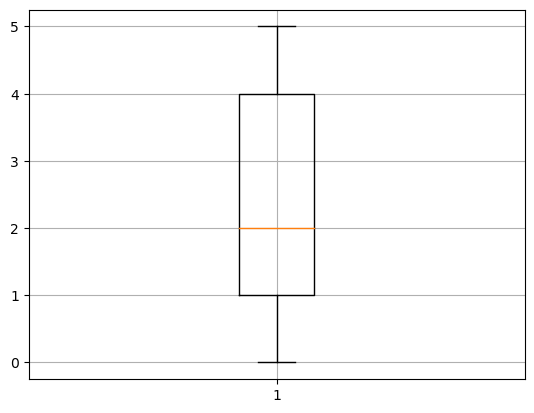

----------------------------------------------------------------------------
Boxplot de Total_visits_online:       


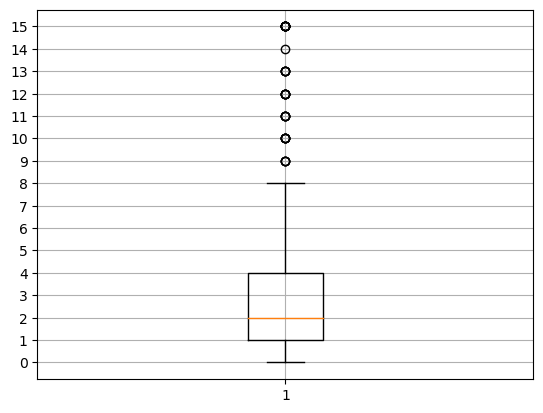

----------------------------------------------------------------------------
Boxplot de Total_calls_made:       


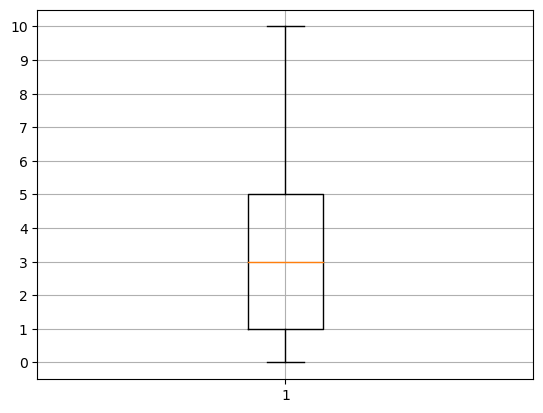

In [13]:
print("Boxplot de Total Credit Cards:        ")
plt.yticks(np.arange(0, 12))
plt.grid(True)
plt.boxplot(credit.loc[:,"Total_Credit_Cards"])
plt.show()

print("----------------------------------------------------------------------------")

print("Boxplot de Total_visits_bank:         ")
plt.yticks(np.arange(0, 6))
plt.grid(True)
plt.boxplot(credit.loc[:,"Total_visits_bank"])
plt.show()


print("----------------------------------------------------------------------------")

print("Boxplot de Total_visits_online:       ")
plt.yticks(np.arange(0, 16))
plt.grid(True)
plt.boxplot(credit.loc[:,"Total_visits_online"])
plt.show()

print("----------------------------------------------------------------------------")

print("Boxplot de Total_calls_made:       ")
plt.yticks(np.arange(0, 12))
plt.grid(True)
plt.boxplot(credit.loc[:,"Total_calls_made"])
plt.show()


Voy a realizar un modelo de K-means para agrupar a los clientes en determinados grupos

Supongamos que queremos agrupar a los clientes en dos grupos, para ver el comportamiento con el consumo de la tarjeta de credito

Y vamos a tratar de agrupar a los clientes en dos grupos: aquellos que tienen un alto uso de la tarjeta y aquellos que tienen un bajo uso de la misma

In [14]:
from sklearn.cluster import KMeans


In [15]:
kmeans = KMeans(n_clusters = 4, n_init=10)

In [16]:
kmeans.fit(credits)

KMeans(n_clusters=4, n_init=10)

In [17]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [18]:
print("Centroides:")
print(centroids)
print("Etiquetas de los clusters:")
print(labels)


Centroides:
[[1.23994975e+04 3.75879397e+00 2.11306533e+00 2.41708543e+00
  4.71105528e+00]
 [1.60676471e+05 8.67647059e+00 5.88235294e-01 1.11470588e+01
  1.00000000e+00]
 [4.18000000e+04 5.53333333e+00 3.42222222e+00 1.05925926e+00
  2.08148148e+00]
 [7.28817204e+04 6.10752688e+00 2.82795699e+00 2.53763441e+00
  1.88172043e+00]]
Etiquetas de los clusters:
[3 2 2 2 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Recordatorio: hay que establecer bien cuantos k vamos a poner en nuestro modelo